<a href="https://colab.research.google.com/github/kzkzgit/video_to_bvh/blob/master/video_to_bvh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initial imports, install, initializations 
####Be patient it'll take some time :)

In [0]:
!git clone https://github.com/Dene33/keras_Realtime_Multi-Person_Pose_Estimation.git
!pip install configobj
!apt install ffmpeg
!apt-get install blender

!apt install python2.7 python-pip
!git clone https://github.com/Dene33/hmr.git
!wget https://people.eecs.berkeley.edu/~kanazawa/cachedir/hmr/models.tar.gz && tar -xf models.tar.gz
!mv models hmr/
!pip2 install -r hmr/requirements.txt
!mkdir hmr/output
!mkdir hmr/output/csv
!mkdir hmr/output/images
!mkdir hmr/output/csv_joined
!mkdir hmr/output/bvh_animation

import os
os.chdir('keras_Realtime_Multi-Person_Pose_Estimation')
!bash model/get_keras_model.sh
!mkdir sample_jsons
!mkdir sample_videos
!mkdir sample_images

exec(open('model_load.py').read())
!pip2 install opendr==0.77

Cloning into 'keras_Realtime_Multi-Person_Pose_Estimation'...
remote: Enumerating objects: 196, done.
remote: Total 196 (delta 0), reused 0 (delta 0), pack-reused 196
Receiving objects: 100% (196/196), 29.49 MiB | 40.75 MiB/s, done.
Resolving deltas: 100% (80/80), done.
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=2ddb20517dac5589f1317ad6c997242fb5553a0014ea7648df2d6ab32eff9ac3
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  blender-data fonts-dejavu fonts-dejavu-core fonts-dejavu-extr

Using TensorFlow backend.








     |████████████████████████████████| 245kB 4.3MB/s 
  Created wheel for opendr: filename=opendr-0.77-cp27-cp27mu-linux_x86_64.whl size=6826407 sha256=6d94b2b6650507857f5a7cd0afeac1d9692444b5133055ca3f7697a3f74f1fe9
  Stored in directory: /root/.cache/pip/wheels/5c/cd/7c/8f4035d040aacef26bccc11cebfe69cc44871e020b1f5e598b
Successfully built opendr


##Upload video

In [0]:
#upload video
exec(open('upload_videos.py').read())

Saving borelo500ms.mp4 to borelo500ms.mp4
User uploaded file "borelo500ms.mp4" with length 157323 bytes


##Process the video
####<font color='green'>`24`</font> in `video_to_images.sh` stands for desired fps rate at which you want to convert video to images

In [0]:
# 1. removes the duplicated 'log_dir' registration
!sed -i '59d' ../hmr/src/config.py

# 2. add None as the first auguments of tf.name_scope for these three files
!sed -i '40d' ../hmr/src/models.py
!sed -i '40i \    with tf.name_scope(None, "Encoder_resnet", [x]):' ../hmr/src/models.py
!sed -i '21d' ../hmr/src/tf_smpl/batch_lbs.py
!sed -i '21i \    with tf.name_scope(None, "batch_skew", [vec]):' ../hmr/src/tf_smpl/batch_lbs.py
!sed -i '107d' ../hmr/src/tf_smpl/batch_lbs.py
!sed -i '107i \    with tf.name_scope(None, "batch_forward_kinematics", [Rs, Js]):' ../hmr/src/tf_smpl/batch_lbs.py

# 3. cast the sorting key to string
!sed -i '194d' ../hmr/demo.py
!sed -i '194i \  all_files.sort(key=lambda x: str(x.split("/")[-1].split("/")[0]))' ../hmr/demo.py

In [0]:
os.chdir('keras_Realtime_Multi-Person_Pose_Estimation')
!pwd

/content/keras_Realtime_Multi-Person_Pose_Estimation


In [0]:
#convert to images, specify fps rate
#!bash video_to_images.sh 1

#2d pose estimation. For each image creates corresponding .json file with format
#similar to output .json format of openpose (https://github.com/CMU-Perceptual-Computing-Lab/openpose)
#exec(open('2d_pose_estimation.py').read())

#3d pose estimation
os.chdir('..')
!bash hmr/3dpose_estimate.sh

#convert estimated .csv files to bvh
!blender --background hmr/csv_to_bvh.blend -noaudio -P hmr/csv_to_bvh.py

Processing borelo500ms001
W0916 06:32:12.619570 140540380616576 deprecation_wrapper.py:119] From hmr/demo.py:124: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-09-16 06:32:12.621349: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-09-16 06:32:12.624440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-09-16 06:32:12.624884: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2019-09-16 06:32:12.625157: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2019-09-16 06:32:12.626971: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Succe

##Download .bvh

In [0]:
from google.colab import files
files.download('hmr/output/bvh_animation/estimated_animation.bvh')

##Display results of 3d pose estimation (optional)

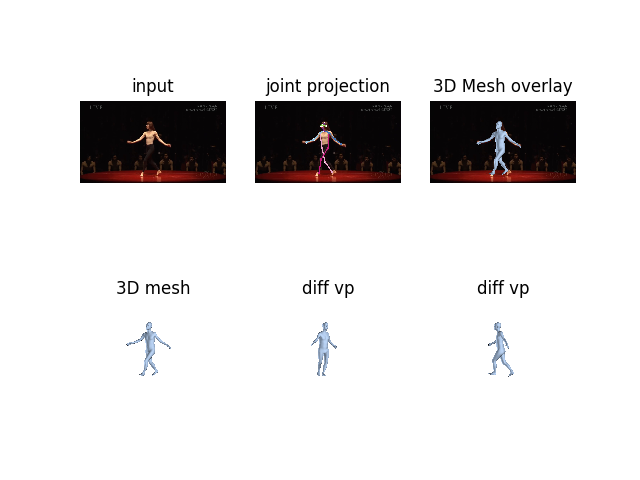

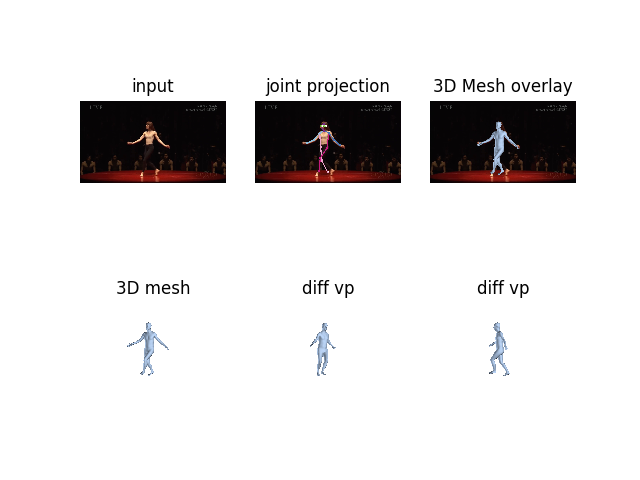

In [0]:
from IPython.display import Image, display

images = os.listdir('hmr/output/images')
extensions = {".jpg", ".png", ".gif", ".bmp", ".jpeg"}

for image in sorted(images):
  for ext in extensions:
    if image.endswith(ext):
      display(Image('hmr/output/images/'+image, width=512))

##Clear all the generated data if you want to process new video

In [0]:
!rm keras_Realtime_Multi-Person_Pose_Estimation/sample_images/*
!rm keras_Realtime_Multi-Person_Pose_Estimation/sample_jsons/*
!rm keras_Realtime_Multi-Person_Pose_Estimation/sample_videos/*
!rm hmr/output/bvh_animation/*
!rm hmr/output/csv/*
!rm hmr/output/csv_joined/*
!rm hmr/output/images/*

####Based on:


1.   **End-to-end Recovery of Human Shape and Pose** by *Angjoo Kanazawa, Michael J. Black, David W. Jacobs, Jitendra Malik *
https://github.com/akanazawa/hmr  

  Corresponding fork by *Denis Cera*: https://github.com/Dene33/hmr

2.   **Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields** by *Zhe Cao, Tomas Simon, Shih-En Wei, Yaser Sheikh* \
Keras implementation by *Michal Faber*: https://github.com/michalfaber/keras_Realtime_Multi-Person_Pose_Estimation

  Corresponding fork by *Denis Cera*: https://github.com/Dene33/keras_Realtime_Multi-Person_Pose_Estimation


